In [1]:
import os
import torch
import torchaudio
from IPython.display import Audio
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import random
from collections import Counter
from tqdm import tqdm
from matplotlib.pyplot import imshow

In [2]:
import Phase_Vocoder as pv
import yin_pitch_prediction as yin

In [5]:
original = yin.get_frequency(550, length=0.2)
off = yin.get_frequency(553, length=0.2)
octave_higher = yin.get_frequency(1000, length=0.2)
composite = original + octave_higher

In [6]:
Audio(original, rate=yin.sample_rate)

In [7]:
Audio(off, rate=yin.sample_rate)

In [8]:
Audio(composite, rate=yin.sample_rate)

In [9]:
Audio(np.real(ifft(fft(original) + fft(octave_higher))), rate=yin.sample_rate)

In [10]:
def d(w, x):
    assert len(w) == len(x)
    return np.absolute(scipy.ndimage.convolve1d(w, x)).max()

In [11]:
d(original, composite)

3199.9999999999814

In [12]:
d(octave_higher, composite)

3199.999999999982

In [13]:
d(octave_higher, original)

22.517684963903736

In [14]:
d(off, original)

2134.783840797919

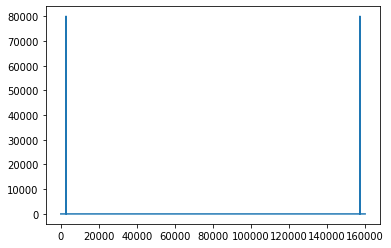

In [77]:
plt.plot(np.absolute(fft(original)))

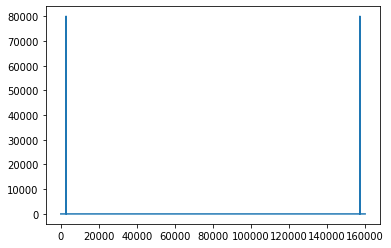

In [78]:
plt.plot(np.absolute(fft(off)))

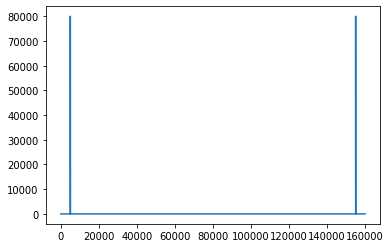

In [28]:
plt.plot(d(original, octave_higher))

In [ ]:
Audio(yin.get_frequency(550, length=5), rate=yin.sample_rate)